#### sklearn.metrics.roc_curve

* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

* parameters
    - y_true
    - y_score
    - pos_label : 긍정인 label ,default=1
    - sample_weight
    - drop_intermediate
* return
    - fpr
    - tpr
    - thresholds

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

train_df = pd.read_csv("./datasets/titanic_train.csv")
test_df = pd.read_csv("./datasets/titanic_test.csv")
y_test = pd.read_csv('./datasets/titanic_test_y.csv')
y_test = y_test['Survived']


# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

train_df = transform_features(train_df)
test_df = transform_features(test_df)

# label,feature
x_train = train_df.drop("Survived",axis=1)
y_train = train_df['Survived']
x_test = test_df

## logistic regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
pred_proba = lr.predict_proba(x_test)


[[0.90004657 0.09995343]
 [0.56777228 0.43222772]
 [0.89778678 0.10221322]
 [0.89259509 0.10740491]
 [0.36447892 0.63552108]
 [0.84377387 0.15622613]
 [0.3871788  0.6128212 ]
 [0.75912493 0.24087507]
 [0.26397839 0.73602161]
 [0.87198541 0.12801459]
 [0.90256127 0.09743873]
 [0.70565918 0.29434082]
 [0.04977606 0.95022394]
 [0.91485654 0.08514346]
 [0.13274651 0.86725349]
 [0.14641714 0.85358286]
 [0.78207977 0.21792023]
 [0.82946098 0.17053902]
 [0.40366249 0.59633751]
 [0.467459   0.532541  ]
 [0.69760638 0.30239362]
 [0.82066084 0.17933916]
 [0.1038909  0.8961091 ]
 [0.4277182  0.5722818 ]
 [0.07891103 0.92108897]
 [0.94684745 0.05315255]
 [0.03492072 0.96507928]
 [0.83638003 0.16361997]
 [0.51576004 0.48423996]
 [0.86866386 0.13133614]
 [0.87473424 0.12526576]
 [0.74679445 0.25320555]
 [0.45231313 0.54768687]
 [0.43002674 0.56997326]
 [0.38842193 0.61157807]
 [0.81741595 0.18258405]
 [0.43002674 0.56997326]
 [0.35683534 0.64316466]
 [0.8860716  0.1139284 ]
 [0.90256127 0.09743873]


샘플 index로 추출한 임계값: [0.97 0.88 0.83 0.77 0.66 0.63 0.61 0.59 0.57 0.54 0.51 0.41 0.27 0.25
 0.22 0.16 0.14 0.13 0.11 0.1  0.1  0.08] 

fpr: [0.   0.   0.   0.   0.01 0.01 0.02 0.03 0.05 0.06 0.08 0.14 0.27 0.33
 0.39 0.47 0.55 0.65 0.75 0.8  0.92 0.96] 

tpr: [0.01 0.25 0.41 0.54 0.64 0.72 0.84 0.87 0.88 0.96 0.99 1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.  ]


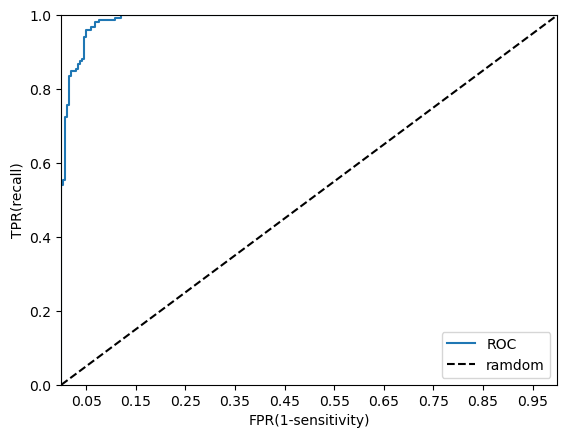

In [17]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)
# 반환된 임계값 배열에서 샘플로 데이터를 추출하되, 임계값을 5step으로 추출.
# threshold[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작

thr_index = np.arange(1,thresholds.shape[0],5)
print('샘플 index로 추출한 임계값:', np.round(thresholds[thr_index],2),"\n")

## 임계값에 따른 fpr.tpr
print('fpr:',np.round(fprs[thr_index],2),"\n")
print('tpr:',np.round(tprs[thr_index],2))


def roc_curve_plot(y_test,pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_c1)
    
    # Roc curve를 plot 곡선으로 기름
    plt.plot(fprs,tprs,label='ROC')
    ## 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],"k--",label="ramdom")
    
    ## fpr x축을 scale을 0.1단위로 변경 x,y축 명 설정
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-sensitivity)')
    plt.ylabel('TPR(recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test,pred_proba_class1)

#### sklearn.metrics.roc_auc_score
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

* parameters
    - y_true
    - y_score :probability of the class with the greater label
    - average : If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data
    - max_fpr
    - multi_class : Only used for multiclass targets. Determines the type of configuration to use. The default value raises an error, so either 'ovr' or 'ovo' must be passed explicitly.
    - labels : Only used for multiclass targets. List of labels that index the classes in y_score. If None, the numerical or lexicographical order of the labels in y_true is used.

* returns
    - auc

In [18]:
## multiclass일때는 label로 넣어 주는게 좋다
from sklearn.metrics import roc_auc_score
pred = lr.predict(x_test)
roc_score = roc_auc_score(y_test,pred)
print(f' Roc AUC score {np.round(roc_score,4)}')

 Roc AUC score 0.9539


In [20]:
# 일반적으로 label에 큰값의 proba열을 사용하여 적합
pred_proba = lr.predict_proba(x_test)
roc_score_prob = roc_auc_score(y_test,pred_proba[:,1])
print(f'Roc Auc score {np.round(roc_score_prob,4)}')

Roc Auc score 0.9888
